# Assess whether the model is spun up

In [11]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy.stats as scs

##### Parameters:

In [29]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800

isize = imax - imin
jsize = jmax - jmin

year  = 2002
month = 8

stn_i = [104-1, 100, 91, 175, 175, 233, 214, 352, 242, 458, 508, 547, 629]
stn_j = [370, 365, 353, 311, 326, 313, 281, 281, 364, 332, 384, 457, 471]

In [30]:
initial = '/data/brogalla/IC/Mn_ini_20180716.nc'
end_yr1 = '/data/brogalla/run_storage/Mn-set2-202004/ref-spin-up0/'
end_yr2 = '/data/brogalla/run_storage/Mn-set2-202004/ref-spin-up1/'
end_yr3 = '/data/brogalla/run_storage/Mn-set2-202004/ref-spin-up2/'
end_yr4 = '/data/brogalla/run_storage/Mn-set2-202004/ref-spin-up3/'
fday    = 'ANHA12_EXH006_5d_20020101_20021231_ptrc_T_20021227-20021231.nc'
monthly =  'ANHA12_EXH006_2002_monthly.nc'

In [31]:
colors = ['#f9ddd8', '#f2ac9f', '#ea7a65', '#e5593f', '#a03e2c', \
          '#e0dfea', '#b1b0cc', '#646199', '#46436b', \
          '#3d6977', '#5b9db3', '#84bfd2', '#c1dfe8'] # CB

name   = ['CAA1', 'CAA2', 'CAA3', 'CAA4', 'CAA5', 'CAA6', 'CAA7', 'CAA8', 'CAA9', \
          'CB1', 'CB2', 'CB3', 'CB4']

##### Define functions:

In [32]:
def load_file(path, ini=False, tmask=tmask):
    
    file = nc.Dataset(path)
    if ini:
        dmn = np.array(file.variables['dMn'])
        cond = (tmask[0,:,:,:] < 0.1) 
    else:
        dmn  = np.array(file.variables['dissolmn'])
        cond = (tmask[0,:,imin:imax,jmin:jmax] < 0.1) 
        
    dmn_masked = np.ma.masked_where(cond, dmn[0,:,:,:]) 
    
    return dmn_masked

##### Load files:

In [33]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
tmask = tmask[:,:,:,:]

In [34]:
ref   = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12-EXH006_y2015m01d05_gridT.nc',  'r')
depth = np.array(ref.variables['deptht'])

In [35]:
mn_ini  = load_file(initial, ini=True)
mn_end1 = load_file(end_yr1 + fday)
mn_end2 = load_file(end_yr2 + fday)
mn_end3 = load_file(end_yr3 + fday)
# mn_end4 = load_file(end_yr4 + fday)

##### Calculations:

In [36]:
tmask_full  = np.empty((12,50,isize,jsize))
tmask_full[:] = tmask[0,:,imin:imax,jmin:jmax]

In [37]:
cond      = (tmask_full < 0.1) 
mn_m1     = nc.Dataset(end_yr1 + monthly)
mn_month1 = np.ma.masked_where(cond, np.array(mn_m1.variables['dissolmn'][:,0,:,:,:]))
mn_m2     = nc.Dataset(end_yr2 + monthly)
mn_month2 = np.ma.masked_where(cond, np.array(mn_m2.variables['dissolmn'][:,0,:,:,:]))
mn_m3     = nc.Dataset(end_yr3 + monthly)
mn_month3 = np.ma.masked_where(cond, np.array(mn_m3.variables['dissolmn'][:,0,:,:,:]))
# mn_m4     = nc.Dataset(end_yr4 + monthly)
# mn_month4 = np.ma.masked_where(cond, np.array(mn_m4.variables['dissolmn'][:,0,:,:,:]))

In [38]:
diff1 = np.empty((12,12))
diff2 = np.empty((12,12))
# diff3 = np.empty((12,12))
for i in range(0,len(stni)): # loop over the number of stations
    diff1[i,:] = np.sum(np.abs(mn_month2[:, :, stni[i], stnj[i]] - mn_month1[:, :, stni[i], stnj[i]]), axis=1)
    diff2[i,:] = np.sum(np.abs(mn_month3[:, :, stni[i], stnj[i]] - mn_month2[:, :, stni[i], stnj[i]]), axis=1)
#     diff3[i,:] = np.sum(np.abs(mn_month4[:, :, stni[i], stnj[i]] - mn_month3[:, :, stni[i], stnj[i]]), axis=1)

##### Figures:

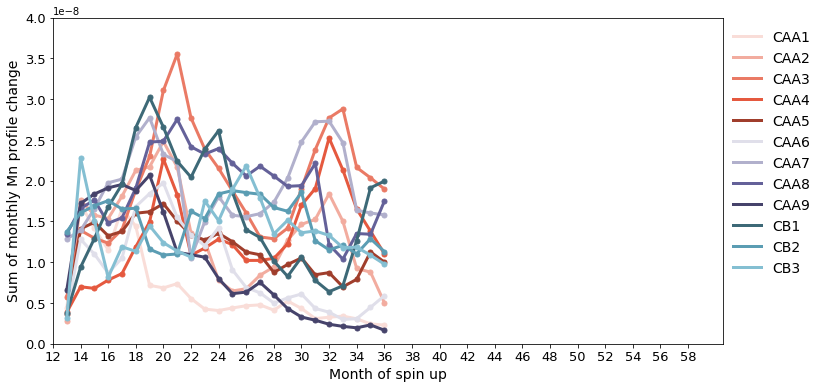

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))

for stn in range(0,12):
    ax.plot(range(1+12,37), np.append(diff1[stn,:], diff2[stn,:]), \
            c=colors[stn], label=name[stn], linewidth=3)
    ax.plot(range(1+12,37), np.append(diff1[stn,:], diff2[stn,:]), '.', \
            markersize=10, c=colors[stn])
ax.set_xlim([12.5, 60.5])
ax.set_ylim([0, 4e-8])
ax.xaxis.set_ticks(np.arange(12, 48+12, 2))
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_xlabel('Month of spin up', fontsize=14)
ax.set_ylabel('Sum of monthly Mn profile change', fontsize=14)
ax.legend(bbox_to_anchor=(1.15, 1.00), fontsize=14, frameon=False)
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/Mn_spin-up-reference-20190917.png', bbox_inches='tight')

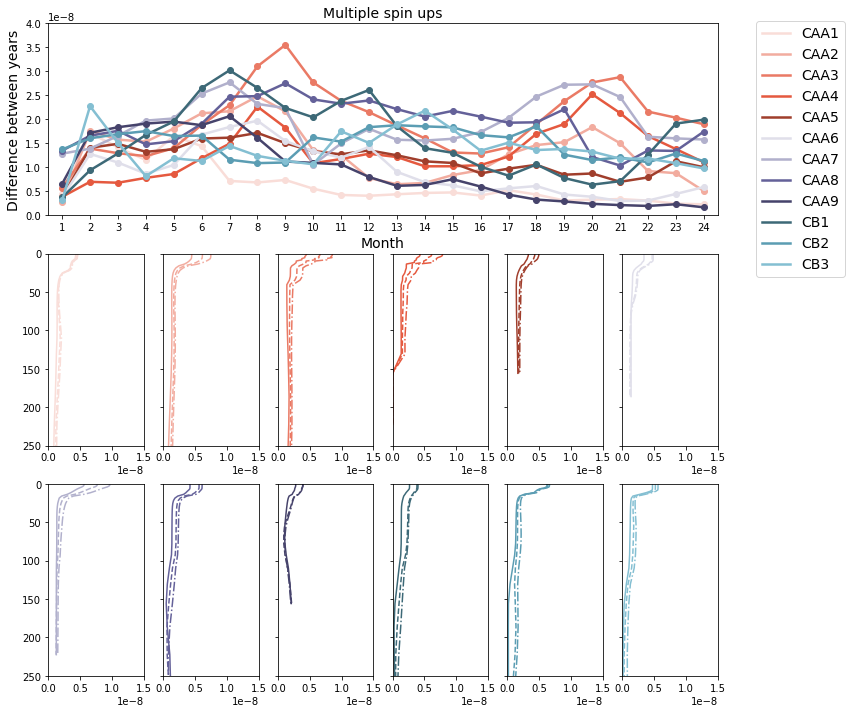

In [48]:
fig = plt.subplots(figsize=(12,12))

ax1 = plt.subplot2grid((3, 6), (0, 0), colspan=6)
ax2 = plt.subplot2grid((3, 6), (1, 0))
ax3 = plt.subplot2grid((3, 6), (1, 1))
ax4 = plt.subplot2grid((3, 6), (1, 2))
ax5 = plt.subplot2grid((3, 6), (1, 3))
ax6 = plt.subplot2grid((3, 6), (1, 4))
ax7 = plt.subplot2grid((3, 6), (1, 5))

ax8 = plt.subplot2grid((3, 6), (2, 0))
ax9 = plt.subplot2grid((3, 6), (2, 1))
ax10 = plt.subplot2grid((3, 6), (2, 2))
ax11 = plt.subplot2grid((3, 6), (2, 3))
ax12 = plt.subplot2grid((3, 6), (2, 4))
ax13 = plt.subplot2grid((3, 6), (2, 5))

# top plot:
ax3.yaxis.set_ticklabels([]); ax4.yaxis.set_ticklabels([]); ax5.yaxis.set_ticklabels([]);
ax6.yaxis.set_ticklabels([]); ax7.yaxis.set_ticklabels([]); ax9.yaxis.set_ticklabels([]);
ax10.yaxis.set_ticklabels([]); ax11.yaxis.set_ticklabels([]); ax12.yaxis.set_ticklabels([]);
ax13.yaxis.set_ticklabels([])

for stn in range(0,12):
    ax1.plot(range(1,25), np.append(diff1[stn,:], diff2[stn,:]), \
            c=colors[stn], label=name[stn], linewidth=2.5)
    ax1.plot(range(1,25), np.append(diff1[stn,:], diff2[stn,:]), '.', \
            markersize=12, c=colors[stn])

ax1.set_xlim([0.5, 24.5])
ax1.set_ylim([0, 4e-8])
ax1.xaxis.set_ticks(np.arange(1, 25, 1))
ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('Difference between years', fontsize=14)
ax1.set_title('Multiple spin ups', fontsize=14)
ax1.legend(bbox_to_anchor=(1.20, 1.05), fontsize=14)

#Other plots:
stn=0
for ax in [ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13]:
    ax.invert_yaxis()
    ax.set_ylim([250, 0])
    ax.set_xlim([0, 15e-9])

    mth=7
    ax.plot(mn_month1[mth,:,stni[stn], stnj[stn]], depth, c=colors[stn])
    ax.plot(mn_month2[mth,:,stni[stn], stnj[stn]], depth, '--', c=colors[stn])
    ax.plot(mn_month3[mth,:,stni[stn], stnj[stn]], depth, '-.', c=colors[stn])
    
    stn+=1